In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import networkx as nx
from networkx.algorithms import community

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('~/Downloads/OnlineTeaching_3.csv')

In [6]:
df.set_index(df['user_id'])

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,stripped_text
user_id,,,,,,,,,,,,,,,,,,,,,
477001228,477001228,1241942443383119872,2020-03-23T04:18:47Z,drgbz,"the best solution I have found, at least for D...",TweetDeck,280,NaN,NaN,NaN,...,7601,2012-01-28T18:38:59Z,False,https://t.co/yx0lx4KYND,http://about.me/gregoryzobel,NaN,https://pbs.twimg.com/profile_banners/47700122...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1198096952...,"the best solution I have found, at least for D..."
1197321263347191808,1197321263347191808,1241940776013058053,2020-03-23T04:12:09Z,mserikabuendia,"This is part of my reg routine, Slides with Ag...",Twitter for iPhone,216,NaN,NaN,NaN,...,408,2019-11-21T01:10:18Z,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/11973212...,NaN,http://pbs.twimg.com/profile_images/1198833427...,"This is part of my reg routine, Slides with Ag..."
715047944777515008,715047944777515008,1241940032723644417,2020-03-23T04:09:12Z,lecturesource,"#Professors, we're all in need of content and ...",Twitter Web App,235,NaN,NaN,NaN,...,2768,2016-03-30T05:28:09Z,False,https://t.co/fRy9CuOi4U,http://lecturesource.net,NaN,https://pbs.twimg.com/profile_banners/71504794...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8910500037...,"#Professors, we're all in need of content and ..."
715047944777515008,715047944777515008,1239609226768441344,2020-03-16T17:47:25Z,lecturesource,"NO Membership fees! Find lectures, activities,...",Twitter Web App,228,NaN,NaN,NaN,...,2768,2016-03-30T05:28:09Z,False,https://t.co/fRy9CuOi4U,http://lecturesource.net,NaN,https://pbs.twimg.com/profile_banners/71504794...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8910500037...,"NO Membership fees! Find lectures, activities,..."
715047944777515008,715047944777515008,1239715048819281920,2020-03-17T00:47:55Z,lecturesource,Online student project...complete weekly &amp;...,Twitter Web App,196,NaN,NaN,NaN,...,2768,2016-03-30T05:28:09Z,False,https://t.co/fRy9CuOi4U,http://lecturesource.net,NaN,https://pbs.twimg.com/profile_banners/71504794...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8910500037...,Online student project...complete weekly &; su...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23568186,23568186,1239014609098440704,2020-03-15T02:24:37Z,madradish,"People who do #onlinelearning stuff, what’s th...",Twitter for iPad,253,NaN,NaN,NaN,...,1232,2009-03-10T07:37:23Z,False,https://t.co/Wb0314c4Ve,http://yarnbrarian.wordpress.com/,NaN,https://pbs.twimg.com/profile_banners/23568186...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/1022671293...,"People who do #onlinelearning stuff, what’s th..."
410933789,410933789,1239011486292303874,2020-03-15T02:12:12Z,HealthyAcademic,Resharing the list of resources I’ve been comp...,Twitter for iPhone,216,NaN,NaN,NaN,...,950,2011-11-12T19:33:00Z,False,https://t.co/mlu3ibDhL2,http://healthyacademic.com/,NaN,https://pbs.twimg.com/profile_banners/41093378...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/4167352528...,Resharing the list of resources I’ve been comp...
29318951,29318951,1239005579512877058,2020-03-15T01:48:44Z,STEMeducator,Truer words have never been spoken! 😆 #COVID19...,Twitter for iPhone,68,NaN,NaN,NaN,...,2909,2009-04-06T23:04:45Z,False,https://t.co/bPwHUr3fzJ,http://www.margaretmohrschroeder.com,NaN,https://pbs.twimg.com/profile_banners/29318951...,http://abs.twimg.com/images/themes/theme6/bg.gif,http://pbs.twimg.com/profile_images/125677939/...,Truer words have never been spoken! 😆 #COVID19...


In [7]:
adj_matrix = pd.crosstab(df['user_id'].dropna().astype(int),df['reply_to_user_id'].dropna().astype(int))

In [8]:
idx = adj_matrix.columns.union(adj_matrix.index)
adj_matrix = adj_matrix.reindex(index = idx, columns=idx, fill_value=0)

In [9]:
graph = nx.from_pandas_adjacency(adj_matrix,create_using=nx.path_graph(10))

In [10]:
np.array(list(nx.average_neighbor_degree(graph).values())).mean()

1.295677136102668

In [11]:
nx.number_connected_components(graph)

183

In [12]:
nx.local_efficiency(graph)

0.01659067882472138

In [13]:
nx.global_efficiency(graph)

0.003068858576123755

In [14]:
nx.degree_histogram(graph)

[0, 257, 64, 6, 1, 0, 0, 0, 0, 1]

In [15]:
nx.density(graph)

0.003854992957224405

In [16]:
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 329\nNumber of edges: 208\nAverage degree:   1.2644'

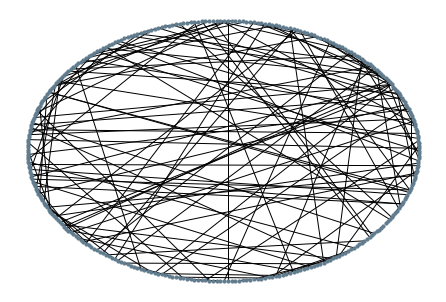

In [17]:
nx.draw_circular(graph,node_size=10,node_color='#607c8e')

Community analysis using Girvan-Newman Algorithm

In [18]:
comp = community.girvan_newman(graph)

In [19]:
communities = list(sorted(c) for c in next(comp))

In [20]:
sorted_communities = sorted(communities,key=len,reverse=True)

In [21]:
communities_distr = [len(x) for x in sorted_communities]

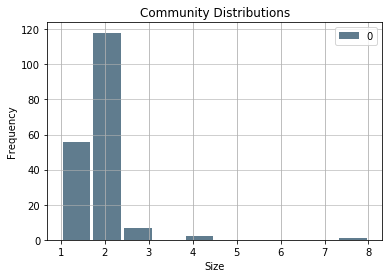

In [22]:
pd.DataFrame(communities_distr).plot.hist(grid=True, rwidth=0.9, color='#607c8e')
plt.title('Community Distributions')
plt.xlabel('Size')
plt.grid(axis='y', alpha=0.75)